# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc, classification_report)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [6]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
y=y.values.ravel()

### Random Forest Important Variables

In [7]:
random=42
rfXlist=['radius_worst',
'concave points_worst',
'texture_worst',
'texture_mean',
'smoothness_worst',
'compactness_worst',
'area_worst',
'area_se',
'concavity_mean',
'smoothness_mean' ]
rfX=X[rfXlist].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(rfX, y, test_size=0.30, random_state=random)

## Logistic Regression

In [9]:
lr= LogisticRegression(random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.9472361809045227
Test Accuracy:  0.9649122807017544
Training ROC_AUC:  0.9389639093285894
Test ROC_AUC:  0.9623015873015873


## Tuning

In [10]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, random_state=42)


0.9912105820105821

In [11]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
16,0.106209,0.056344,0.004117,0.000855,1000,5000,l2,lbfgs,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",1.000000,...,0.984000,0.994667,0.992000,0.992000,1.0,0.971429,1.000000,0.991211,0.011041,1
15,0.182497,0.022299,0.004033,0.000983,1000,5000,l2,newton-cg,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",1.000000,...,0.984000,0.994667,0.992000,0.992000,1.0,0.971429,1.000000,0.990944,0.011157,2
0,0.175657,0.046092,0.005200,0.001536,100,5000,l2,newton-cg,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.992000,...,0.978667,0.992000,0.994667,0.992000,1.0,0.968571,1.000000,0.990938,0.010620,3
17,0.007257,0.001277,0.003805,0.000750,1000,5000,l2,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",0.989333,...,0.984000,0.992000,0.997333,0.989333,1.0,0.971429,0.997222,0.990862,0.010630,4
4,0.255811,0.106511,0.007034,0.002416,10,5000,l2,lbfgs,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.984000,...,0.973333,0.992000,0.997333,0.994667,1.0,0.962857,0.994444,0.990832,0.010768,5
3,0.193137,0.038362,0.005501,0.000992,10,5000,l2,newton-cg,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.984000,...,0.973333,0.992000,0.997333,0.994667,1.0,0.962857,0.994444,0.990654,0.010748,6
2,0.009901,0.001350,0.006700,0.001160,100,5000,l2,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.989333,...,0.970667,0.992000,0.992000,0.989333,1.0,0.971429,0.994444,0.990499,0.011002,7
1,0.100887,0.043048,0.004800,0.001302,100,5000,l2,lbfgs,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.989333,...,0.970667,0.992000,0.997333,0.989333,1.0,0.968571,1.000000,0.990238,0.011531,8
5,0.008262,0.001338,0.005400,0.001083,10,5000,l2,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.968000,...,0.976000,0.992000,0.992000,0.981333,1.0,0.974286,0.994444,0.990154,0.011453,9
6,0.155047,0.029874,0.005367,0.001169,1,5000,l2,newton-cg,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l2', ...",0.957333,...,0.970667,0.989333,0.994667,0.997333,1.0,0.965714,0.991667,0.987432,0.013441,10


In [63]:
lr= LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='lbfgs')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9698492462311558
0.9766081871345029
Training ROC_AUC:  0.9664699064715236
Test ROC_AUC:  0.974867724867725


Accuracy : 97.66
precision : 96.83
recall : 96.83


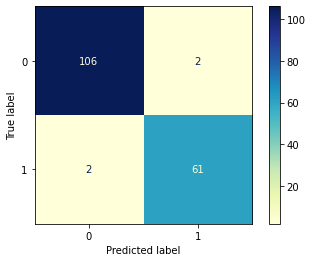

In [13]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [97]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       108
   Malignant       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 0, 'False Positive Rate')

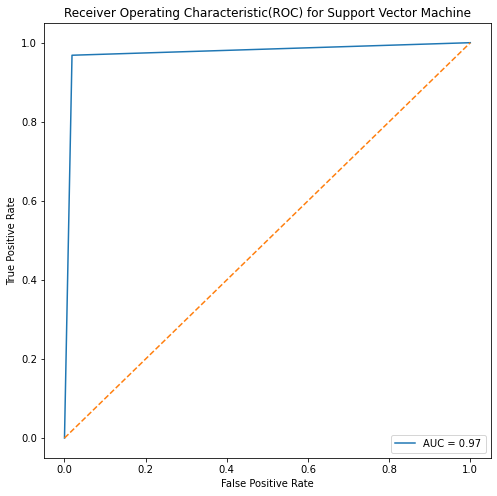

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

### LASSO Tuning

In [15]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.9914846560846562

In [16]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
5,0.023018,0.006487,0.005035,0.000795,1000,5000,l1,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l1',...",1.000000,...,0.984000,0.997333,0.992000,0.994667,1.000000,0.971429,1.000000,0.991485,0.011083,1
0,0.047334,0.036116,0.006869,0.001166,100,5000,l1,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l1', ...",1.000000,...,0.984000,0.997333,0.992000,0.994667,1.000000,0.968571,1.000000,0.991389,0.011096,2
1,0.069296,0.046777,0.006839,0.002581,10,5000,l1,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l1', '...",0.997333,...,0.978667,0.994667,0.997333,0.989333,1.000000,0.974286,1.000000,0.991043,0.010076,3
2,0.046580,0.008978,0.007234,0.001943,1,5000,l1,liblinear,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l1', ...",0.954667,...,0.965333,0.992000,0.994667,0.981333,1.000000,0.974286,0.994444,0.988718,0.013371,4
3,0.017967,0.001684,0.005381,0.000988,0.1,5000,l1,liblinear,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', ...",0.898667,...,0.960000,0.981333,0.984000,0.973333,1.000000,0.888571,0.988889,0.973181,0.029316,5
4,0.010901,0.001535,0.005501,0.000885,0.01,5000,l1,liblinear,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l1',...",0.872000,...,0.954667,0.928000,0.946667,0.968000,0.989333,0.814286,0.980556,0.946321,0.041562,6


##### Tuned Model

In [17]:
lr= LogisticRegression(penalty='l1', C=1000, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9723618090452262
Test Score:  0.9766081871345029
Training ROC_AUC:  0.9711732837389827
Test ROC_AUC:  0.974867724867725


Accuracy : 97.66
precision : 96.83
recall : 96.83


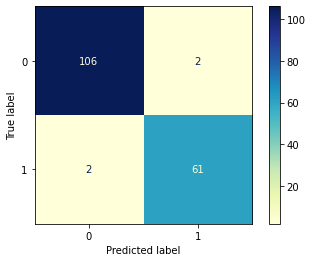

In [18]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [19]:
# last 5 are what was predicted incorrectly
residuals = lr.predict_proba(X_test)[:,1] - y_test
sortIdx=np.argsort(np.abs(residuals))
residDF=X_test.iloc[sortIdx].copy()
residDF["resid"]=residuals[sortIdx]
residDF['y_true']=y_test[sortIdx]
residDF['y_pred']=y_test_pred[sortIdx]
# print(residDF.std())
outliers=residDF.tail(15)
outliers
# outliers.std()
#sns.regplot(x = residuals, y = y_test_pred, scatter = True, color = 'red');

,radius_worst,concave points_worst,texture_worst,texture_mean,smoothness_worst,compactness_worst,area_worst,area_se,concavity_mean,smoothness_mean,resid,y_true,y_pred
204,14.97,0.10150,24.64,18.60,0.14260,0.23780,677.9,30.29,0.08005,0.09965,0.046702,0,0
414,17.26,0.06575,36.91,29.81,0.11480,0.09866,931.4,45.38,0.04686,0.08320,-0.054053,1,1
148,15.85,0.15990,19.85,15.18,0.13160,0.27350,766.9,21.20,0.08487,0.09970,0.075810,0,0
228,14.20,0.11800,31.31,23.97,0.12270,0.34540,624.0,18.51,0.05438,0.07903,0.078635,0,0
88,13.83,0.12050,30.50,21.80,0.13040,0.24630,574.7,20.95,0.06015,0.08772,0.091010,0,0
89,16.34,0.13970,18.24,15.24,0.12770,0.30890,803.6,42.76,0.09966,0.11320,0.095749,0,0
86,16.21,0.12250,29.25,21.46,0.13060,0.19760,808.9,38.87,0.12040,0.09444,-0.122865,1,1
526,15.35,0.14270,25.16,18.75,0.16240,0.31240,719.8,16.07,0.04201,0.10750,0.197039,0,0
396,14.80,0.14530,27.20,18.89,0.14280,0.25700,675.2,19.29,0.08580,0.10590,0.208798,0,0
542,16.51,0.10950,32.29,25.42,0.10600,0.13760,826.4,27.41,0.04105,0.08275,0.413159,0,0


In [20]:
residDF.groupby('y_true').mean()

,radius_worst,concave points_worst,texture_worst,texture_mean,smoothness_worst,compactness_worst,area_worst,area_se,concavity_mean,smoothness_mean,resid,y_pred
y_true,,,,,,,,,,,,
0,13.188380,0.073641,23.808611,18.094167,0.125902,0.183516,541.462963,20.851676,0.045052,0.093203,0.027721,0.018519
1,21.436032,0.189681,29.965079,22.163333,0.147222,0.408268,1453.939683,72.096508,0.168397,0.104290,-0.034410,0.968254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


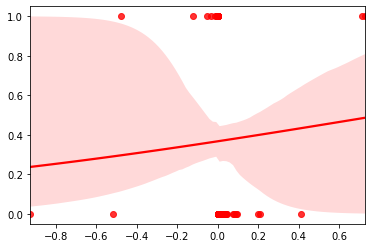

In [21]:
sns.regplot(x = residuals, y = y_test_pred, logistic=True, scatter = True, color = 'red');

## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9447236180904522
0.9532163742690059
Training ROC_AUC:  0.9369558772000754
Test ROC_AUC:  0.9497354497354498


#### Bernoulli

In [23]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6256281407035176
0.631578947368421
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [24]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=1e-08)


0.991273544973545

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [25]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
88,0.004835,0.000733,0.004933,0.000574,1e-08,{'var_smoothing': 1e-08},1.0,1.000000,1.000000,1.0,...,0.973333,1.0,0.986667,0.992000,1.0,0.985714,0.991667,0.991274,0.010713,1
90,0.005406,0.000968,0.005395,0.001141,6.57933e-09,{'var_smoothing': 6.579332246575682e-09},1.0,1.000000,1.000000,1.0,...,0.973333,1.0,0.986667,0.986667,1.0,0.985714,0.994444,0.991097,0.011018,2
89,0.005167,0.000820,0.005535,0.000719,8.11131e-09,{'var_smoothing': 8.111308307896856e-09},1.0,1.000000,1.000000,1.0,...,0.973333,1.0,0.984000,0.986667,1.0,0.985714,0.991667,0.991001,0.010693,3
86,0.005333,0.000649,0.006017,0.000971,1.51991e-08,{'var_smoothing': 1.519911082952933e-08},1.0,1.000000,1.000000,1.0,...,0.970667,1.0,0.981333,0.992000,1.0,0.991429,0.991667,0.990931,0.011090,4
87,0.004834,0.000820,0.005200,0.001276,1.23285e-08,{'var_smoothing': 1.232846739442066e-08},1.0,1.000000,1.000000,1.0,...,0.970667,1.0,0.986667,0.992000,1.0,0.985714,0.991667,0.990912,0.011093,5
91,0.007501,0.001522,0.007472,0.001454,5.3367e-09,{'var_smoothing': 5.336699231206302e-09},1.0,0.997333,1.000000,1.0,...,0.970667,1.0,0.981333,0.986667,1.0,0.985714,0.994444,0.990748,0.011374,6
85,0.005937,0.000629,0.006097,0.000599,1.87382e-08,{'var_smoothing': 1.873817422860383e-08},1.0,0.997333,0.997333,1.0,...,0.970667,1.0,0.978667,0.992000,1.0,0.988571,0.991667,0.990747,0.010926,7
92,0.006901,0.001758,0.006634,0.001378,4.32876e-09,{'var_smoothing': 4.328761281083061e-09},1.0,0.997333,1.000000,1.0,...,0.970667,1.0,0.981333,0.986667,1.0,0.982857,0.991667,0.990738,0.011324,8
93,0.009185,0.010074,0.010046,0.007592,3.51119e-09,{'var_smoothing': 3.5111917342151273e-09},1.0,0.997333,1.000000,1.0,...,0.973333,1.0,0.981333,0.984000,1.0,0.982857,0.991667,0.990738,0.011366,9
94,0.010034,0.005529,0.009034,0.003168,2.84804e-09,{'var_smoothing': 2.848035868435805e-09},1.0,0.997333,1.000000,1.0,...,0.973333,1.0,0.981333,0.978667,1.0,0.982857,0.991667,0.990382,0.012051,10


##### Tuned Model

In [26]:
gnb = GaussianNB(var_smoothing=1e-08)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9422110552763819
0.9649122807017544
Training ROC_AUC:  0.9295571547936713
Test ROC_AUC:  0.958994708994709


Text(0.5, 0, 'False Positive Rate')

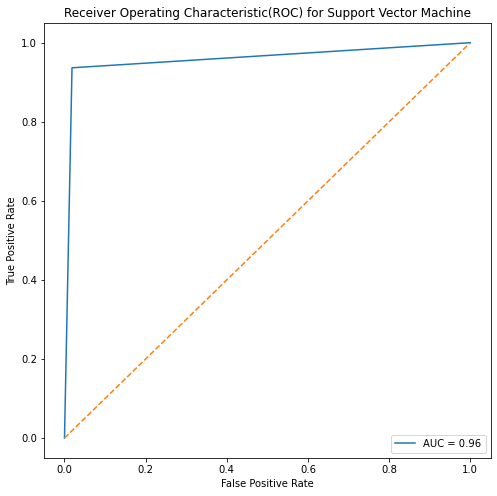

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9221105527638191
0.9590643274853801
Training ROC_AUC:  0.9067545349181962
Test ROC_AUC:  0.9477513227513227


### Tuning

In [29]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=21, p=1)


0.9708566137566137

In [30]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
40,0.006634,0.001016,0.008067,0.000727,21,1,"{'n_neighbors': 21, 'p': 1}",0.978667,0.996000,0.992000,...,0.965333,0.977333,0.980000,0.993333,0.996000,0.868571,0.972222,0.970857,0.030315,1
38,0.007466,0.001284,0.009301,0.001696,20,1,"{'n_neighbors': 20, 'p': 1}",0.978667,0.993333,0.989333,...,0.941333,0.976000,0.985333,0.997333,0.997333,0.868571,0.972222,0.970729,0.030571,2
36,0.006600,0.001356,0.008335,0.001248,19,1,"{'n_neighbors': 19, 'p': 1}",0.978667,0.994667,0.993333,...,0.941333,0.977333,0.986667,0.992000,0.997333,0.874286,0.972222,0.970589,0.030254,3
42,0.006398,0.000664,0.008001,0.000684,22,1,"{'n_neighbors': 22, 'p': 1}",0.978667,0.996000,0.992000,...,0.961333,0.974667,0.977333,0.993333,0.994667,0.868571,0.972222,0.970053,0.030255,4
46,0.007867,0.001310,0.009718,0.001729,24,1,"{'n_neighbors': 24, 'p': 1}",0.974667,0.997333,0.993333,...,0.958667,0.973333,0.976000,0.993333,0.994667,0.862857,0.986111,0.969385,0.031476,5
44,0.007867,0.001175,0.010101,0.001076,23,1,"{'n_neighbors': 23, 'p': 1}",0.974667,0.994667,0.990667,...,0.960000,0.973333,0.977333,0.990667,0.994667,0.868571,0.972222,0.969299,0.030338,6
48,0.007500,0.000620,0.009568,0.000616,25,1,"{'n_neighbors': 25, 'p': 1}",0.969333,0.997333,0.992000,...,0.958667,0.973333,0.973333,0.994667,0.994667,0.862857,0.986111,0.968854,0.031651,7
50,0.007767,0.001146,0.009811,0.000796,26,1,"{'n_neighbors': 26, 'p': 1}",0.968000,0.998667,0.993333,...,0.958667,0.969333,0.972000,0.994667,0.994667,0.861429,0.986111,0.968135,0.032153,8
56,0.007611,0.000480,0.010201,0.001222,29,1,"{'n_neighbors': 29, 'p': 1}",0.970667,1.000000,0.990667,...,0.952000,0.969333,0.970667,0.993333,0.994667,0.858571,0.986111,0.967857,0.032761,9
32,0.007668,0.000978,0.008700,0.001214,17,1,"{'n_neighbors': 17, 'p': 1}",0.981333,0.994667,0.993333,...,0.941333,0.981333,0.985333,0.989333,0.997333,0.880000,0.972222,0.967585,0.032415,10


##### Tuned Model

In [101]:
knn=KNeighborsClassifier(n_neighbors=21, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))


0.914572864321608
0.9590643274853801
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9477513227513227


In [102]:
knn=KNeighborsClassifier(n_neighbors=17, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9649122807017544
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9523809523809523


Text(0.5, 0, 'False Positive Rate')

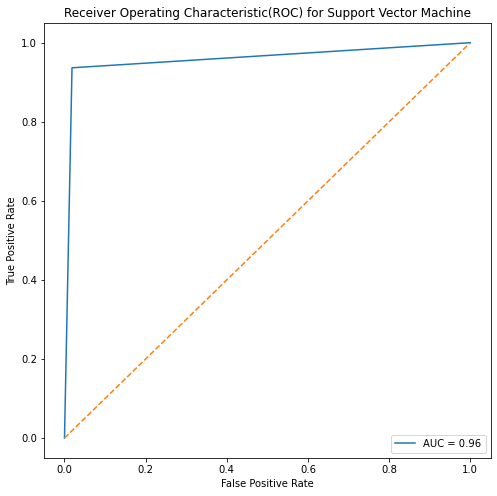

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## SVM

In [34]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8994974874371859
0.9473684210526315
Training ROC_AUC:  0.8752055200668446
Test ROC_AUC:  0.9318783068783069


### Tuning

In [35]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50)


0.970615343915344

In [36]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.006386,0.000834,0.004568,0.000804,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.949333,1.000000,...,0.965333,0.965333,0.965333,0.989333,0.992000,0.888571,0.983333,0.970615,0.024922,1
0,0.006472,0.000722,0.004768,0.000844,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",0.952000,1.000000,...,0.965333,0.952000,0.962667,0.989333,0.992000,0.874286,0.986111,0.967098,0.028355,2
4,0.006741,0.000959,0.005301,0.001215,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.938667,1.000000,...,0.960000,0.946667,0.962667,0.986667,0.994667,0.854286,0.983333,0.961419,0.031874,3
3,0.005467,0.000991,0.004700,0.000641,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.944000,0.997333,...,0.962667,0.944000,0.962667,0.986667,0.994667,0.851429,0.983333,0.961146,0.031886,4
7,0.006200,0.000909,0.004801,0.000833,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.944000,0.997333,...,0.960000,0.944000,0.960000,0.986667,0.994667,0.851429,0.983333,0.959720,0.032469,5
6,0.005334,0.000907,0.004667,0.000597,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.944000,0.997333,...,0.957333,0.944000,0.960000,0.986667,0.994667,0.851429,0.983333,0.959631,0.032406,6
9,0.005871,0.000885,0.004668,0.000537,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.944000,0.997333,...,0.957333,0.944000,0.960000,0.986667,0.994667,0.851429,0.983333,0.959631,0.032406,6
12,0.006166,0.001003,0.004505,0.000762,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.944000,0.997333,...,0.957333,0.944000,0.960000,0.986667,0.994667,0.851429,0.983333,0.959631,0.032406,6
10,0.006700,0.001269,0.004535,0.000805,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.941333,0.997333,...,0.957333,0.944000,0.960000,0.986667,0.994667,0.851429,0.983333,0.959542,0.032453,9
13,0.008933,0.001152,0.004807,0.000656,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.941333,0.997333,...,0.957333,0.944000,0.960000,0.986667,0.994667,0.851429,0.983333,0.959542,0.032453,9


##### Tuned Model

In [37]:
clf = SVC(C=50, kernel='rbf')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9120603015075377
0.9532163742690059
Training ROC_AUC:  0.8919840435567774
Test ROC_AUC:  0.9365079365079365


In [38]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9095477386934674
0.9473684210526315
Training ROC_AUC:  0.8886283388587908
Test ROC_AUC:  0.9318783068783069


## Decision trees

In [39]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.935672514619883
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9325396825396824


### Tuning

In [40]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 5, 'max_features': 0.6, 'max_leaf_nodes': 50, 'min_samples_leaf': 10}


0.9721767195767196

In [41]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
303,0.007414,0.001608,0.006238,0.000992,5,0.6,50,10,"{'max_depth': 5, 'max_features': 0.6, 'max_lea...",0.917333,...,0.957333,0.965333,0.944000,0.993333,0.969333,0.920000,0.987500,0.972177,0.024467,1
279,0.006067,0.000512,0.006267,0.000998,5,0.4,30,10,"{'max_depth': 5, 'max_features': 0.4, 'max_lea...",0.988000,...,0.940000,1.000000,0.949333,1.000000,0.929333,0.947143,0.986111,0.970972,0.026583,2
355,0.005266,0.000629,0.004701,0.000528,6,0.6,20,10,"{'max_depth': 6, 'max_features': 0.6, 'max_lea...",1.000000,...,0.986667,0.984000,0.937333,0.982667,0.997333,0.911429,0.984722,0.969527,0.030321,3
439,0.009134,0.002335,0.008186,0.002682,7,0.8,30,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.993333,...,0.985333,0.997333,0.896000,0.982667,0.972000,0.978571,0.975000,0.969453,0.030176,4
259,0.005033,0.000947,0.005168,0.000687,5,0.2,20,10,"{'max_depth': 5, 'max_features': 0.2, 'max_lea...",0.994667,...,0.929333,0.956000,0.924000,0.998667,0.978667,0.912857,0.995833,0.969283,0.027755,5
411,0.007300,0.001986,0.007668,0.002936,7,0.4,40,10,"{'max_depth': 7, 'max_features': 0.4, 'max_lea...",0.993333,...,0.960000,0.973333,0.914667,0.997333,0.998667,0.980000,0.970833,0.969221,0.029610,6
146,0.004701,0.000782,0.004933,0.000853,3,0.4,20,5,"{'max_depth': 3, 'max_features': 0.4, 'max_lea...",0.978667,...,0.964000,0.933333,0.922667,0.980000,0.997333,0.930000,0.988889,0.969006,0.028128,7
326,0.004799,0.000833,0.004966,0.000794,6,0.2,30,5,"{'max_depth': 6, 'max_features': 0.2, 'max_lea...",0.961333,...,0.905333,0.986667,0.961333,0.978667,1.000000,0.951429,0.994444,0.968876,0.030826,8
319,0.010575,0.002468,0.008668,0.002386,5,0.8,50,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.998667,...,0.989333,0.997333,0.934667,0.952000,0.977333,0.932857,0.990278,0.968806,0.027492,9
447,0.006967,0.000983,0.005901,0.001832,7,0.8,50,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.962667,...,0.986667,0.997333,0.934667,0.952000,0.996000,0.904286,0.975000,0.968587,0.026481,10


##### Tuned Model

In [42]:
clf=tree.DecisionTreeClassifier(max_depth= 5, max_features= 0.6, max_leaf_nodes= 50, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9547738693467337
0.9181286549707602
Training ROC_AUC:  0.9517263685614943
Test ROC_AUC:  0.9120370370370371


## Random Forest

In [56]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9707602339181286
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9623015873015873


### Tuning

In [57]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=6, max_features=0.2, n_estimators=50,
                       random_state=42)


0.9912761904761905

In [58]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
57,0.467969,0.107727,0.043036,0.012936,6,0.2,50,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.968000,1.0,0.973333,1.0,0.997333,0.974286,0.997222,0.991276,0.011400,1
30,0.467662,0.078857,0.031736,0.006072,5,0.2,100,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.973333,1.0,0.976000,1.0,0.997333,0.971429,0.997222,0.991174,0.012050,2
2,0.440869,0.087786,0.033736,0.011178,4,0.2,100,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.981333,1.0,0.968000,1.0,0.997333,0.974286,0.997222,0.990828,0.012273,3
89,1.910414,0.610817,0.109980,0.043604,7,0.2,500,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.968000,1.0,0.981333,1.0,0.997333,0.971429,0.997222,0.990825,0.011966,4
58,0.469494,0.281757,0.030461,0.017772,6,0.2,100,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.957333,1.0,0.973333,1.0,0.997333,0.982857,0.997222,0.990754,0.012864,5
34,4.266536,0.251647,0.236669,0.037035,5,0.2,1000,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.973333,1.0,0.981333,1.0,0.997333,0.962857,0.997222,0.990714,0.012418,6
31,0.862166,0.082483,0.052938,0.008657,5,0.2,200,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.978667,1.0,0.997333,0.957143,0.997222,0.990705,0.013047,7
145,1.191310,0.080888,0.070531,0.017773,9,0.2,500,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.968000,1.0,0.976000,1.0,0.997333,0.967143,0.997222,0.990679,0.012351,8
6,4.666398,0.772003,0.260671,0.063902,4,0.2,1000,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.981333,1.0,0.997333,0.965714,0.997222,0.990635,0.012159,9
146,2.648259,0.432936,0.148574,0.028829,9,0.2,1000,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.965333,1.0,0.978667,1.0,1.000000,0.960000,0.997222,0.990619,0.013137,10


##### Tuned Model

In [110]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=6, max_features=0.2, n_estimators=50,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9949748743718593
0.9649122807017544
Training ROC_AUC:  0.9932885906040269
Test ROC_AUC:  0.9623015873015873


Accuracy : 96.49
precision : 95.24
recall : 95.24


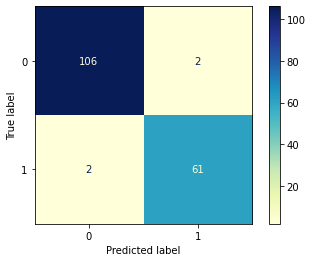

In [105]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [106]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       108
   Malignant       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Text(0.5, 0, 'False Positive Rate')

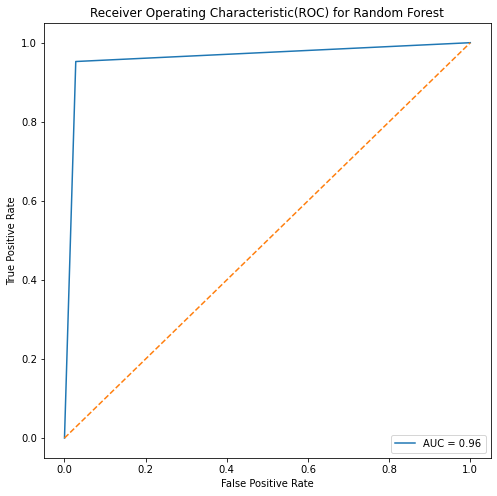

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Random Forest")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [100]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=4, max_features=0.2, n_estimators=100,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9874371859296482
0.9649122807017544
Training ROC_AUC:  0.9832214765100671
Test ROC_AUC:  0.958994708994709


## Stochastic Gradient D

In [44]:
#SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5000, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6834170854271356
0.7777777777777778
Training ROC_AUC:  0.7267728632651411
Test ROC_AUC:  0.8174603174603176


In [45]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(max_iter=5000, random_state=42)


0.8663619047619047

In [46]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,param_random_state,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009000,0.001967,0.006134,0.001117,hinge,l2,42,"{'loss': 'hinge', 'penalty': 'l2', 'random_sta...",0.704000,0.992000,...,0.834667,0.794667,0.914667,0.872000,0.954667,0.762857,0.966667,0.866362,0.071648,1
12,0.007642,0.001020,0.005135,0.000671,perceptron,l2,42,"{'loss': 'perceptron', 'penalty': 'l2', 'rando...",0.704000,0.992000,...,0.834667,0.794667,0.914667,0.872000,0.954667,0.762857,0.966667,0.866362,0.071648,1
3,0.011335,0.001722,0.005601,0.000879,log,l2,42,"{'loss': 'log', 'penalty': 'l2', 'random_state...",0.776000,0.992000,...,0.914667,0.800000,0.800000,0.890667,0.973333,0.757143,0.919444,0.865576,0.069778,3
8,0.009133,0.001478,0.005002,0.000731,modified_huber,elasticnet,42,"{'loss': 'modified_huber', 'penalty': 'elastic...",0.789333,0.992000,...,0.866667,0.893333,0.738667,0.914667,0.973333,0.822857,0.866667,0.865313,0.085316,4
4,0.010427,0.001772,0.004602,0.000712,log,l1,42,"{'loss': 'log', 'penalty': 'l1', 'random_state...",0.754667,0.973333,...,0.882667,0.810667,0.778667,0.882667,0.954667,0.785714,0.905556,0.864835,0.055923,5
10,0.007794,0.001077,0.004873,0.000720,squared_hinge,l1,42,"{'loss': 'squared_hinge', 'penalty': 'l1', 'ra...",0.728000,0.960000,...,0.917333,0.856000,0.778667,0.885333,0.957333,0.800000,0.905556,0.863380,0.065309,6
2,0.009868,0.001667,0.006038,0.001351,hinge,elasticnet,42,"{'loss': 'hinge', 'penalty': 'elasticnet', 'ra...",0.741333,0.992000,...,0.925333,0.906667,0.848000,0.880000,0.973333,0.774286,0.905556,0.863202,0.091900,7
14,0.008311,0.000899,0.004809,0.000646,perceptron,elasticnet,42,"{'loss': 'perceptron', 'penalty': 'elasticnet'...",0.741333,0.992000,...,0.925333,0.906667,0.848000,0.880000,0.973333,0.774286,0.905556,0.863202,0.091900,7
7,0.008467,0.000992,0.005668,0.000830,modified_huber,l1,42,"{'loss': 'modified_huber', 'penalty': 'l1', 'r...",0.754667,0.978667,...,0.680000,0.810667,0.757333,0.882667,0.920000,0.782857,0.905556,0.862437,0.070597,9
9,0.007567,0.001203,0.004968,0.000752,squared_hinge,l2,42,"{'loss': 'squared_hinge', 'penalty': 'l2', 'ra...",0.773333,0.986667,...,0.776000,0.861333,0.800000,0.888000,0.973333,0.791429,0.861111,0.859335,0.086963,10


##### Tuned Model

In [47]:
clf = SGDClassifier(loss='hinge', max_iter=5000, penalty='l2', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6834170854271356
0.7777777777777778
Training ROC_AUC:  0.7267728632651411
Test ROC_AUC:  0.8174603174603176


In [50]:
clf = SGDClassifier(loss='modified_huber', max_iter=100, penalty='elasticnet', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.7361809045226131
0.8128654970760234
Training ROC_AUC:  0.7622031751165737
Test ROC_AUC:  0.8353174603174602


## Stochastic Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9590643274853801
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9543650793650793


### Tuning

In [52]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(max_depth=9, n_estimators=1000, subsample=0.5)


0.9912873015873015

In [53]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
78,3.098594,0.099933,0.006335,0.000743,0.1,9,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",0.997333,...,0.978667,0.994667,0.984000,1.000000,1.000000,0.974286,0.994444,0.991287,0.011179,1
42,136.231337,706.614979,0.009853,0.002145,0.01,7,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",1.000000,...,0.976000,1.000000,0.984000,1.000000,0.997333,0.962857,0.997222,0.990278,0.012526,2
69,3.873107,0.975298,0.008252,0.002327,0.1,7,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.000000,...,0.978667,0.994667,0.989333,1.000000,1.000000,0.971429,0.994444,0.990199,0.012309,3
61,2.493115,0.721114,0.007734,0.002407,0.1,3,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.997333,...,0.978667,0.997333,0.986667,1.000000,1.000000,0.945714,0.997222,0.990072,0.014243,4
66,0.354010,0.040424,0.004901,0.001012,0.1,7,100,0.5,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.000000,...,0.970667,1.000000,0.984000,1.000000,0.997333,0.974286,0.997222,0.989943,0.013594,5
57,0.283291,0.076131,0.007400,0.002075,0.1,3,100,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.976000,1.000000,0.989333,0.997333,1.000000,0.948571,0.997222,0.989893,0.013992,6
60,2.229590,0.539791,0.007863,0.001998,0.1,3,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.978667,0.994667,0.992000,1.000000,1.000000,0.942857,0.997222,0.989806,0.014751,7
33,1.552175,0.060564,0.005502,0.001037,0.01,3,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",1.000000,...,0.978667,1.000000,0.981333,1.000000,1.000000,0.945714,0.997222,0.989805,0.014543,8
51,6.291111,2.015031,0.011535,0.003603,0.01,9,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",1.000000,...,0.973333,1.000000,0.981333,1.000000,0.997333,0.960000,0.994444,0.989550,0.013410,9
70,4.327391,0.694329,0.007658,0.001679,0.1,7,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.000000,...,0.968000,0.992000,0.984000,1.000000,1.000000,0.962857,0.997222,0.989392,0.013183,10


##### Tuned Model

In [54]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.5, max_depth=9)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9556878306878306


In [55]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, subsample=0.5, max_depth=7)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9623015873015873
